In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
import xgboost as xgb
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import seaborn as sns
import plotly.express as px
from collections import defaultdict
import time
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd


In [15]:
full_data = pd.read_csv("/Users/nirugidla/Documents/GitHub/milestone2_MADS/final_df_riley.csv")
print(full_data.shape)

(498803, 37)


In [16]:
full_data.columns

Index(['CHRISTFAM', 'CRD_RANGE', 'CREDRATE', 'ETHNIC_INFER', 'ETHNICCODE',
       'ETHNICGRP', 'FUND_POLIT', 'INCOMESTHH', 'LENGTH_RES', 'NETWORTH',
       'NUMCHILD', 'PRFL_POLITICAL_IDEOLOGY', 'PRFL_TRUMP_SUPPORT', 'RELIGION',
       'STATUS', 'AGE', 'AUTOWORK', 'CNS_MEDINC', 'COUNTY_TYPE', 'EXER_GROUP',
       'GENDER_MIX', 'HH_SIZE', 'HOMEMKTVAL', 'OCCUPATION', 'PERSONS_HH',
       'PETS', 'PRFL_ANML_RIGHTS', 'PRFL_INSURANCE', 'PRFL_TAXES', 'SEX',
       'YEARBUILT', 'INFER_PARTY', 'TOD_PRES_DIFF_2016_PREC',
       'TOD_PRES_DIFF_2020_PREC', 'PRFL_BORDER_SECURITY',
       'PRFL_IMMIGRATION_REFORM', 'PRFL_LIBERAL_NEWS'],
      dtype='object')

In [17]:
full_data['RELIGION'].value_counts()

RELIGION
P    199618
C     89277
J      8839
B      6119
I      4044
O      3072
H      2610
M      1147
G       986
S       977
K       151
L       144
0        15
Name: count, dtype: int64

#### Elbow Method

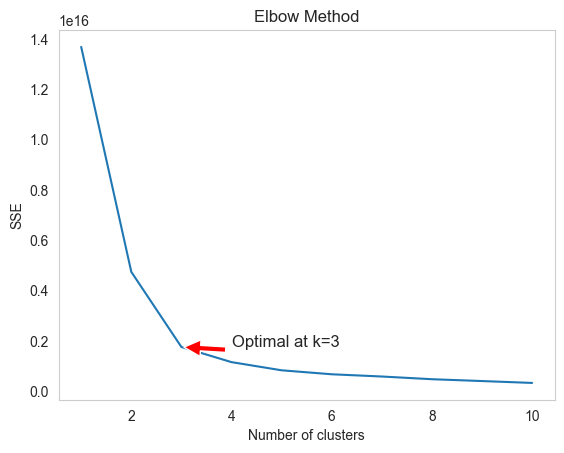

In [18]:
# Use only numerical columns for clustering
X = full_data.select_dtypes(include=[np.number]).dropna()

# Calculate SSE for different K
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse[k] = kmeans.inertia_

# Plot SSE
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method")

# Add arrow annotation
plt.annotate('Optimal at k=3', xy=(3, sse[3]), xytext=(4, sse[3] + 3000),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12)

# Remove grid
plt.grid(False)
plt.show()

In [20]:
X.columns

Index(['CRD_RANGE', 'CREDRATE', 'INCOMESTHH', 'LENGTH_RES', 'NETWORTH',
       'NUMCHILD', 'AGE', 'CNS_MEDINC', 'GENDER_MIX', 'HH_SIZE', 'HOMEMKTVAL',
       'PERSONS_HH', 'YEARBUILT', 'TOD_PRES_DIFF_2016_PREC',
       'TOD_PRES_DIFF_2020_PREC'],
      dtype='object')

#### K-means Clustering

In [14]:
full_data_clean = full_data.dropna(subset=X.columns)

optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(full_data_clean.select_dtypes(include=[np.number]))

full_data_clean['Cluster'] = kmeans.labels_

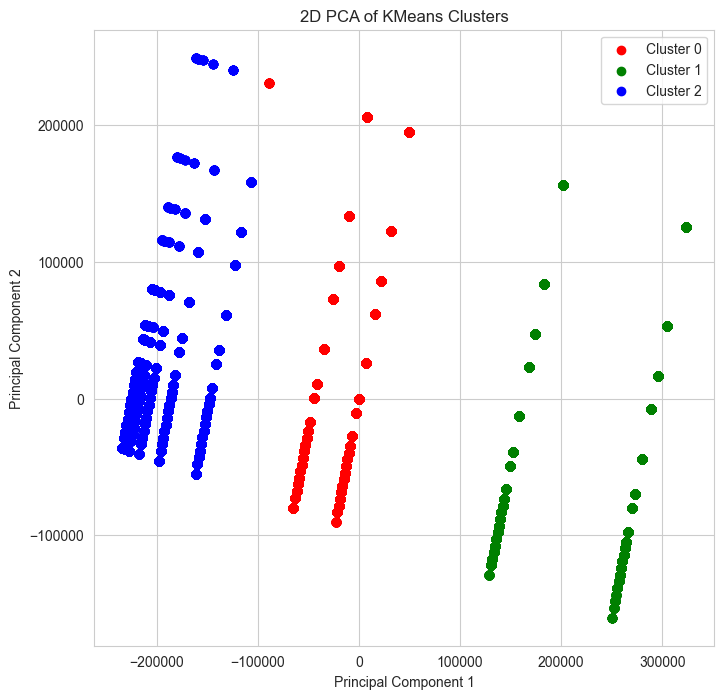

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Previous code
full_data_clean = full_data.dropna(subset=X.columns)
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(full_data_clean.select_dtypes(include=[np.number]))
full_data_clean['Cluster'] = kmeans.labels_

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(full_data_clean.select_dtypes(include=[np.number]))

# Create a DataFrame with the two principal components
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8,8))
colors = ['r', 'g', 'b']
for i in range(optimal_clusters):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['Principal Component 1'], 
                pca_df[pca_df['Cluster'] == i]['Principal Component 2'], 
                c = colors[i], 
                label = f'Cluster {i}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of KMeans Clusters')
plt.legend()
plt.show()

#### Silhouette Analysis

In [15]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.7070449893277418


For n_clusters = 3 The average silhouette_score is : 0.7070449893277418


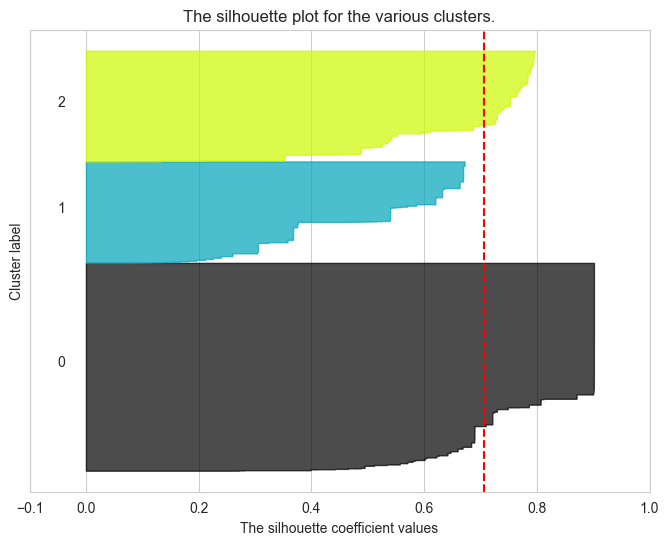

In [17]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

# Previous codes for clustering
full_data_clean = full_data.dropna(subset=X.columns)
optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(full_data_clean.select_dtypes(include=[np.number]))
cluster_labels = kmeans.labels_
full_data_clean['Cluster'] = cluster_labels

# Compute the silhouette scores
X = full_data_clean.select_dtypes(include=[np.number]).drop('Cluster', axis=1)
silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", optimal_clusters,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette values
sample_silhouette_values = silhouette_samples(X, cluster_labels)

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

y_lower = 10
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / optimal_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([]) 
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()